<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_1_Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. scikit-learn의 LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADp_book_ver01/main/data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
x = data['age']
y = data['charges']

import matplotlib.pyplot as plt
# plt.scatter(x,y, alpha = 0.5)
# plt.xlabel("age")
# plt.ylabel('charges')
# plt.show()

<Axes: xlabel='age', ylabel='charges'>

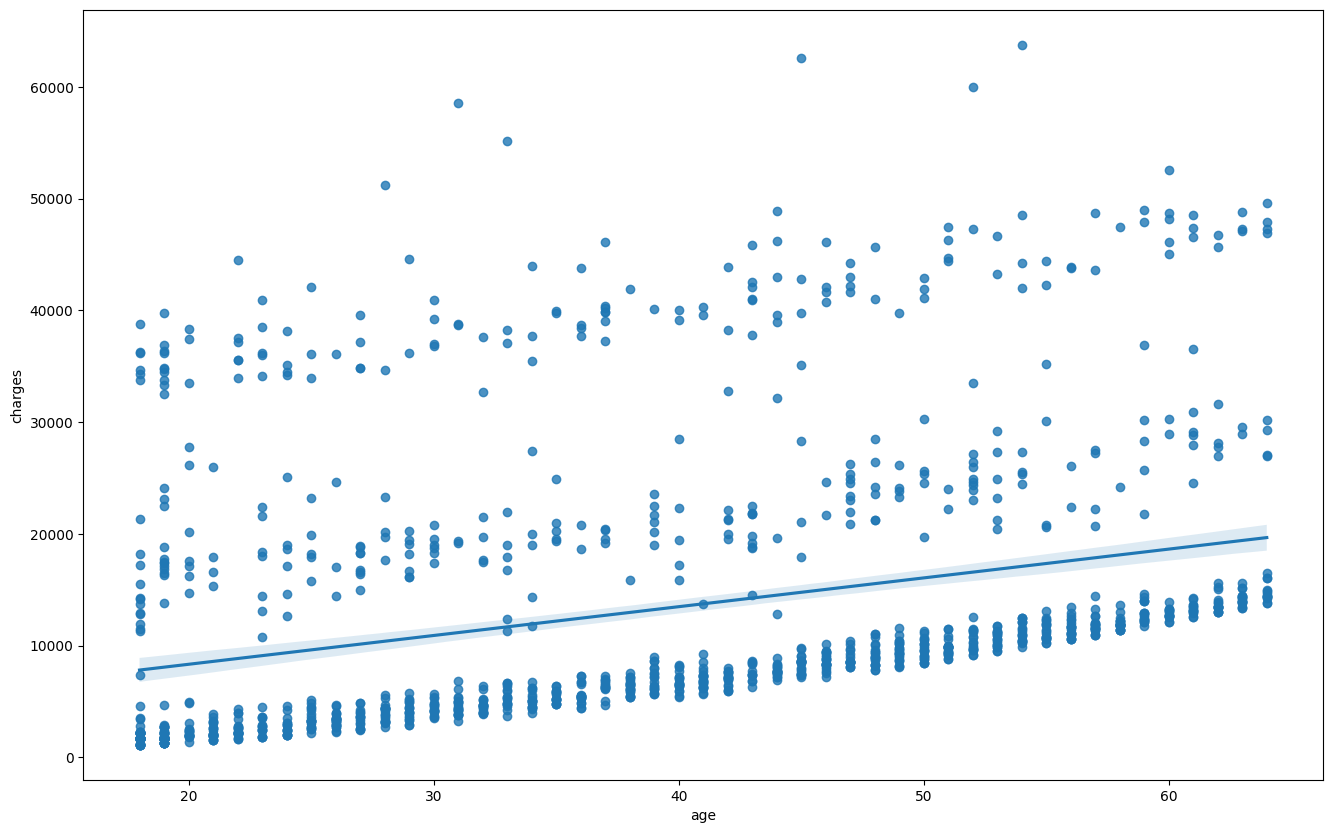

In [3]:
import seaborn as sns
fig, ax = plt.subplots(figsize= (16,10))
sns.regplot(x = x, y = y, ax = ax)

# 나이와 의료비용 사이에 선형성이 발견되어, 우상향하는 추세를 확인할 수 있다.

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(data['age'])
y = np.array(data['charges'])

# **.fit()에 입력되는 데이터는 2차원 array여야 함**

x = x.reshape(-1,1)
y = y.reshape(-1,1)

model.fit(x,y)

LinearRegression()

In [5]:
print("선형 회귀 모델 결과")
print("절편 : ",model.intercept_, "계수 : ",model.coef_)

선형 회귀 모델 결과
절편 :  [3165.88500606] 계수 :  [[257.72261867]]


In [6]:
# 결정계수가 매우 낮으므로, 설명력이 떨어진다고 볼 수 있다.
print(model.score(x,y))

0.08940589967885804


In [7]:
# 산점도 위에 회귀선을 그어 선형 모델이 데이터를 얼마나 설명할 수 있는지 시각화해보자
x_new = [[19],[64]]
y_hat = model.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


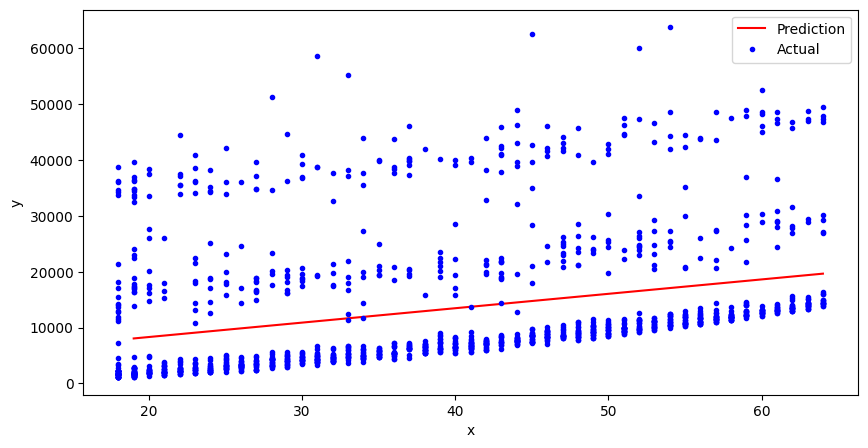

In [8]:
plt.figure(figsize = (10,5))
plt.plot(x_new, y_hat, "-r", label = "Prediction")
plt.plot(x,y, 'b.', label = 'Actual')
plt.legend(loc = 'upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2. scikit-learn의 SGDRegressor

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADp_book_ver01/main/data/insurance.csv")
data

# x = np.array(data['age'])
# y = np.array(data['charges'])
x = data['age'].values
y = data['charges'].values

In [32]:
x = x.reshape(-1,1)

sgd_reg = SGDRegressor(max_iter = 1000, random_state = 200)
sgd_reg.fit(x,y)

SGDRegressor(random_state=200)

In [33]:
print("SGD 회귀 모델 결과")
print("절편", sgd_reg.intercept_, "계수", sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [5676.70219068] 계수 [59.62070706]


In [34]:
x_new = [[19],[64]]
y_hat = sgd_reg.predict(x_new)

print(y_hat)

[6809.49562489 9492.42744277]


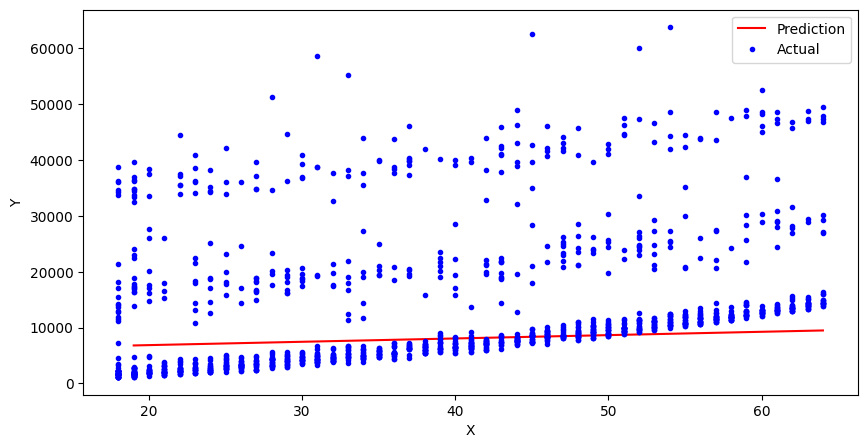

In [35]:
plt.figure(figsize= (10,5))
plt.plot(x_new, y_hat, "-r", label = 'Prediction')
plt.plot(x,y,"b.", label = "Actual")
plt.legend(loc = 'upper right')
plt.xlabel("X")
plt.ylabel('Y')
plt.show()